In [11]:
# import statements
# DONT FORGET TO MAKE + IMPORT OWN PACKAGE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm

3000000.0


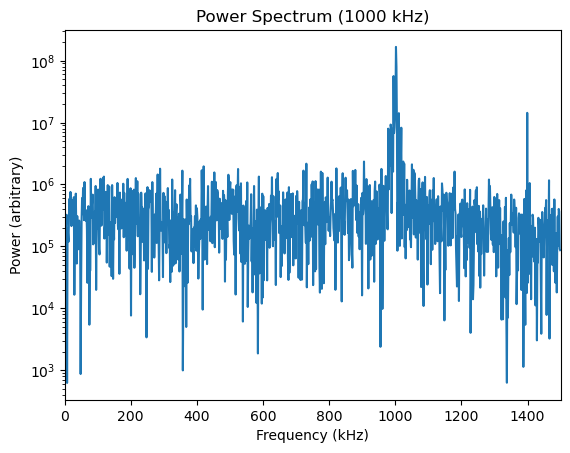

/Users/alainatripp/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


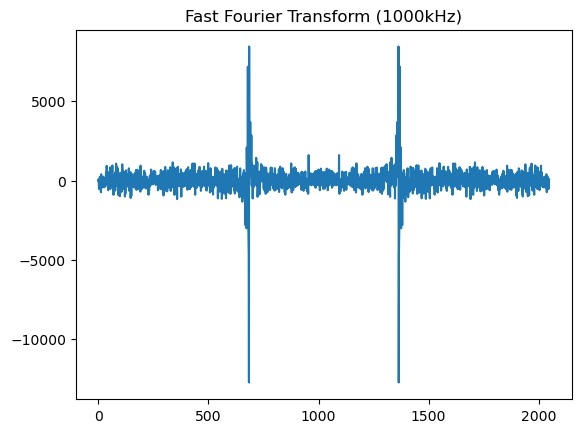

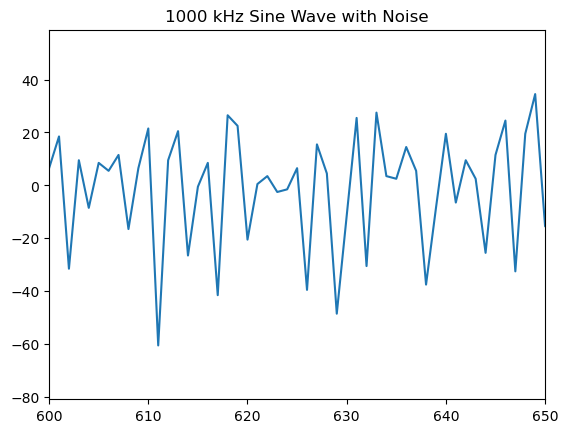

/Users/alainatripp/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/alainatripp/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(-1950.0, 1950.0)

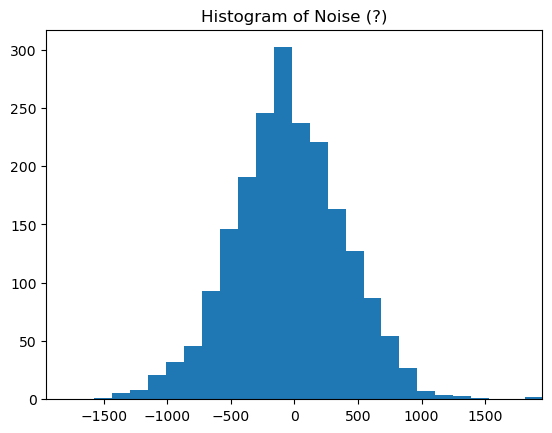

In [12]:
# testing the first thing so that it loads actually 

loaded = np.load("1000khzNoise.npz") # 1 Mhz w noise!!!
data = loaded["data"]
fs   = loaded["fs"]

x = data[3].astype(float) # from "n-blocks" arg, we have 0-9 blocks 
print(fs) # sample freq in hertz

# Remove DC offset
x = x - np.mean(x)

N = len(x)

# FFT
X = np.fft.fft(x)
f = np.fft.fftfreq(N, d=1/fs)

# Power spectrum
P = np.abs(X)**2

# Plot only positive frequencies
mask = f > 0

# plot of power spectrum with only positive freq
plt.semilogy(f[mask]/1e3, P[mask]) # linear x log y
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (arbitrary)")
plt.title("Power Spectrum (1000 kHz)")
plt.xlim(0, 1500)   # only up to Nyquist
plt.show() 

plt.plot(X) # plot of the FFT
plt.title('Fast Fourier Transform (1000kHz)')
plt.show()

plt.plot(x) # sin wave w noise
plt.title('1000 kHz Sine Wave with Noise')
plt.xlim(600, 650)
plt.show()

#counts = len(X) # the stupid code is saying X isnt an array.
# plt.bar(counts, bins)
# plt.show()
#plt.hist(X, bins=1000, weights=counts)
plt.hist(X, bins=150) ## changing bins to make it more gaussian looking (add X.real?)
plt.title('Histogram of Noise (?)')
plt.xlim(-1950, 1950) ## and changing xlim for gaussian-aity

In [ ]:
# real and imag histograms of noise with gaussian fit for 1000kHz
# MAKE INTO IMPORTABLE PACKAGE??

